# Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

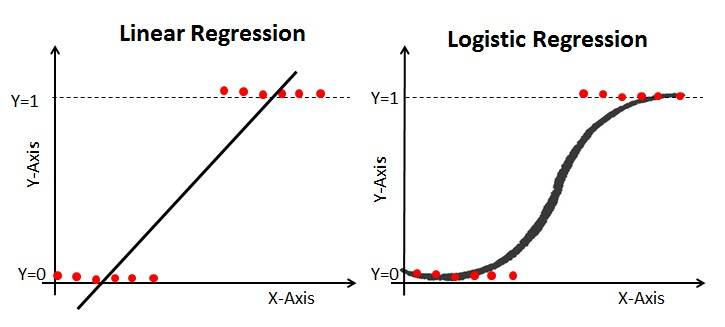


# Example: Multiple Linear Regression from Scratch <a href="#Example:-Multiple-Linear-Regression-from-Scratch-in-Numpy" class="anchor-link">¶</a>

## How does the model actually work behind the scenes?<a href="#How-does-the-model-actually-work-behind-the-scenes?" class="anchor-link">¶</a>

![](https://i.imgur.com/DT4H1Yk.jpg)

# Example: Multiple Linear Regression from Scratch <a href="#Example:-Multiple-Linear-Regression-from-Scratch-in-Numpy" class="anchor-link">¶</a>

## How does the model actually work behind the scenes?<a href="#How-does-the-model-actually-work-behind-the-scenes?" class="anchor-link">¶</a>

![](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548702778023.png)


# Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

Logistic regression is used to classify whether an input belong to a
class (1) or no (0).  

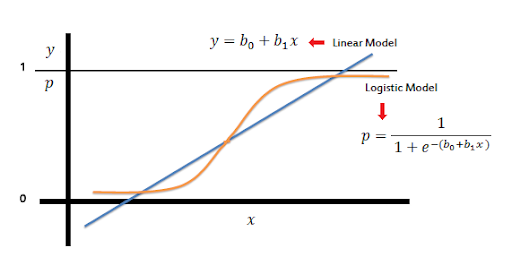

![](https://spss-tutorials.com/img/logistic-regression-curve-examples.png)

# Case study 1: affair data

In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices #model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [18]:
# load dataset
dta = sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


- rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
- age: woman's age
- yrs_married: number of years married
- children: number of children
- religious: woman's rating of how religious she is (1 = not religious, 4 = strongly - religious)
- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
- occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
- occupation_husb: husband's occupation (same coding as above) affairs: time spent in  extra-marital affairs

<AxesSubplot:>

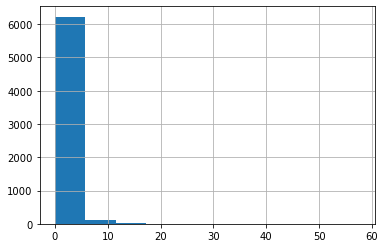

In [19]:
dta['affairs'].hist()

In [20]:
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int) # affairs > 0 -> affair =1, affairs = 0 -> affair = 0  
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


# Data Visualization

Text(0, 0.5, 'Frequency')

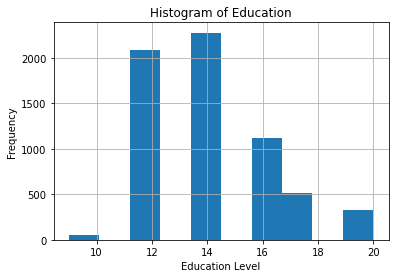

In [21]:
%matplotlib inline
# histogram of education
dta.educ.hist()
plt.title('Histogram of Education')
plt.xlabel('Education Level')
plt.ylabel('Frequency')

- educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)

In [22]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


Text(0, 0.5, 'Frequency')

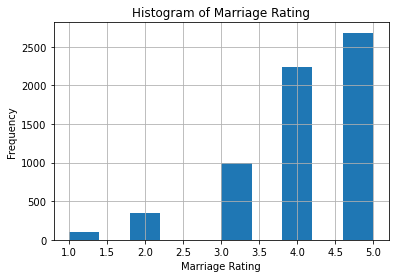

In [23]:
# histogram of marriage rating
dta.rate_marriage.hist()
plt.title('Histogram of Marriage Rating')
plt.xlabel('Marriage Rating')
plt.ylabel('Frequency')

- rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)

In [24]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [25]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs', 'affair'],
      dtype='object')

In [26]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + religious \
                 + educ + occupation + occupation_husb',
                  dta, return_type="dataframe")
print (X.columns)
#y target variable  -> affair = 0: ko ngoai tinh, = 1 ngoai tinh
#X la cac bien con loai (loai tru original affaris)

Index(['Intercept', 'rate_marriage', 'age', 'yrs_married', 'children',
       'religious', 'educ', 'occupation', 'occupation_husb'],
      dtype='object')


In [27]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Jul 2021   Pseudo R-squ.:                  0.1327
Time:                        08:25:47   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
rate_marriage 

In [31]:
# remove children and ocupation_husb
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married  + \
                  religious + educ + occupation',
                  dta, return_type="dataframe")

In [32]:
model = LogisticRegression()
model = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
model.score(X, y) #tinh accuracy cua mo hinh 

0.7233741753063148

<AxesSubplot:>

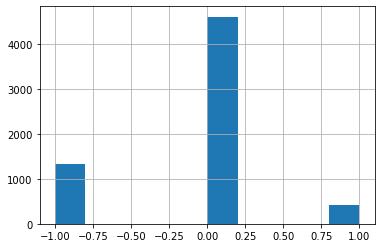

In [34]:
Y_Pred = model.predict(X)
Y_Pred = pd.DataFrame(Y_Pred)
residuals = Y_Pred[0] - y['affair']
residuals.hist()
# 0.72 = so luong y du bao dung/tong so luong y du bao

In [35]:
probs = model.predict_proba(X)
print(probs[:10])
print(Y_Pred[:10])
#threshold = 0.5

[[0.68970051 0.31029949]
 [0.27536704 0.72463296]
 [0.66177276 0.33822724]
 [0.61484004 0.38515996]
 [0.71080323 0.28919677]
 [0.63651739 0.36348261]
 [0.48584416 0.51415584]
 [0.6061265  0.3938735 ]
 [0.54490564 0.45509436]
 [0.46865561 0.53134439]]
     0
0  0.0
1  1.0
2  0.0
3  0.0
4  0.0
5  0.0
6  1.0
7  0.0
8  0.0
9  1.0


In [38]:
# evaluate the model by splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/08/1-16.png)

In [42]:
predicted = model.predict(X_test)
0.3*6366

1909.8

In [40]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

[[1168  135]
 [ 381  226]]


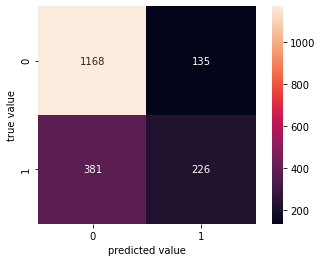

In [41]:
cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [45]:
print(classification_report(y_test, predicted))
# precision 0.75=1168/(1168+381)
# recall 0.90 = 1168/(1168+135)

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



# Precision = right_predict / total predict 
- the rate between right_predict and wrong_predict of each type




# Recall = right_predict/total true value
- -> how exact model can predict for each type

![](https://lawtomated.com/wp-content/uploads/2019/10/F1-Score.png)

# accuracy = total_right_predict/total_datapoint

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

pred_y=model.predict(X_test) 
probs_y=model.predict_proba(X_test) 

Text(0.5, 1.0, 'label = 1')

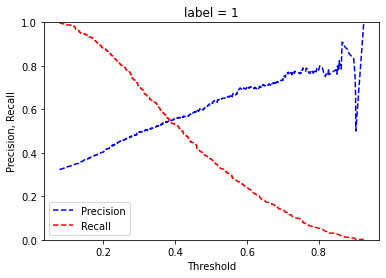

In [48]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test==1, probs_y[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.title('label = 1')

Text(0.5, 1.0, 'label = 0')

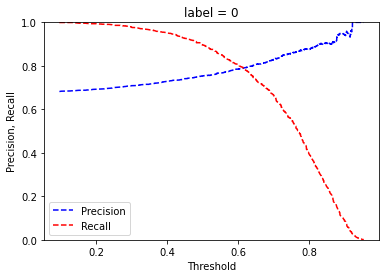

In [49]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test==0, probs_y[:,0]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])
plt.title('label = 0')

In [50]:
print(classification_report(y_test, predicted))
#label = 0 -> mo hinh du bao tuong doi chinh xac
#label = 1 -> mo hinh du bao kem

              precision    recall  f1-score   support

         0.0       0.75      0.90      0.82      1303
         1.0       0.63      0.37      0.47       607

    accuracy                           0.73      1910
   macro avg       0.69      0.63      0.64      1910
weighted avg       0.71      0.73      0.71      1910



array([[<AxesSubplot:title={'center':'affair'}>]], dtype=object)

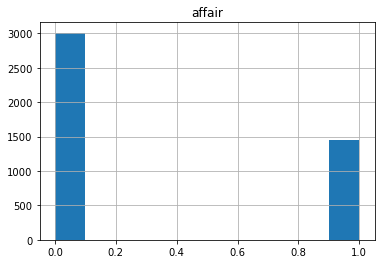

In [53]:
y_train.hist()

<AxesSubplot:>

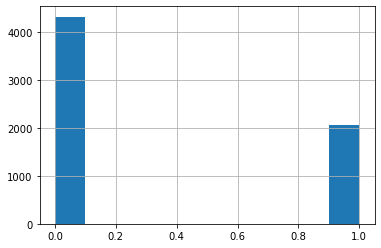

In [54]:
dta['affair'].hist()

In [ ]:
#machine learning don't have critical thinking (suy nghi phan bien)

# Case study 2: Titanic dataset

In [57]:
titanic = pd.read_csv('Titanic_train.csv')

In [56]:
titanic.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [58]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Pclass Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Survived Survival (0 = No; 1 = Yes)
- Name name of passenger
- Sex gender
- Age year old
- sibsp Number of Siblings/Spouses Aboard
- parch Number of Parents/Children Aboard
- ticket Ticket Number
- fare Passenger Fare (British pound)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) #noi xuat phat de len tau titanic

In [60]:
y, X = dmatrices('Survived ~ Pclass + Age + SibSp + Parch + Fare + C(Sex) + C(Embarked)',
                  titanic, return_type="dataframe")
print(X.columns)
# khach hang co survived or not dua vao cac bien.......

Index(['Intercept', 'C(Sex)[T.male]', 'C(Embarked)[T.Q]', 'C(Embarked)[T.S]',
       'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'],
      dtype='object')


In [61]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.444061
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Tue, 13 Jul 2021   Pseudo R-squ.:                  0.3419
Time:                        09:04:48   Log-Likelihood:                -316.17
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 3.392e-66
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            5.6374      0.635      8.884      0.000       4.394       6.881
C(Sex)[T.ma

In [62]:
# remove Embarked, Parch and Fare 
y, X = dmatrices('Survived ~ Pclass + Age + SibSp + C(Sex)',
                  titanic, return_type="dataframe")

In [63]:
import statsmodels.api as sm
model = sm.Logit(y,X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445882
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  714
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            4
Date:                Tue, 13 Jul 2021   Pseudo R-squ.:                  0.3399
Time:                        09:07:30   Log-Likelihood:                -318.36
converged:                       True   LL-Null:                       -482.26
Covariance Type:            nonrobust   LLR p-value:                 1.089e-69
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          5.6008      0.543     10.306      0.000       4.536       6.666
C(Sex)[T.male]   

In [66]:
import math
p_female = 1/(1+math.exp(0))
p_male = 1/(1+math.exp(+2.6235))
print(p_female)
print(p_male)
#ket luan: phu nu co xac suat ton tai cao hon dan ong

0.5
0.06764122864997564


In [67]:
model = LogisticRegression()
model = model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [68]:
model.score(X, y)

0.8081232492997199

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [70]:
predicted = model.predict(X_test)

[[110  15]
 [ 19  71]]


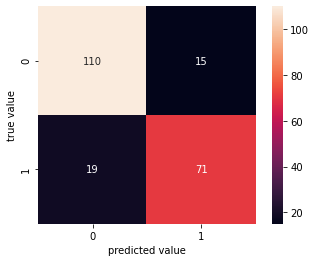

In [71]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predicted)
print(cf_matrix)
sns.heatmap(cf_matrix,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [72]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         0.0       0.85      0.88      0.87       125
         1.0       0.83      0.79      0.81        90

    accuracy                           0.84       215
   macro avg       0.84      0.83      0.84       215
weighted avg       0.84      0.84      0.84       215



array([[<AxesSubplot:title={'center':'Survived'}>]], dtype=object)

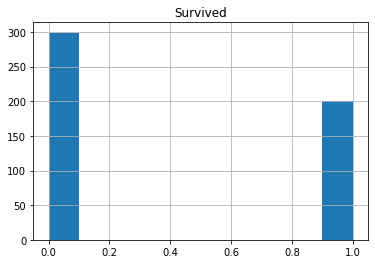

In [73]:
y_train.hist()

In [ ]:
# y_train_affair = 4500, y_train_titanic = 500
# tai sao mo hinh titanic tot hon mo hinh affair
# mo hinh linear trong logistic chua phan anh duoc data affair.

## Case study 3: softmax Regression with wine quality

![](https://data-flair.training/blogs/wp-content/uploads/sites/2/2018/05/softmax-regression-scalargraph-1.png)

![](https://miro.medium.com/max/1400/1*xbKo-8awaX5jpuMdPfBLyQ.png)
- z=a+b1*x1+b2*x2+b3*x3+....+bn*xn
- linear model first

In [74]:
import pandas as pd
wineData = pd.read_csv('winequality-red.csv')
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

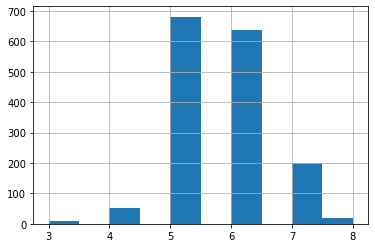

In [76]:
wineData['quality'].hist()

In [77]:
c = []
for q in wineData['quality'].values:
    if q < 6:
        c.append(0)
    elif q > 6:
        c.append(2)
    else:
        c.append(1)

wineData['category'] = c
wineData.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [78]:
from sklearn.preprocessing import StandardScaler
X = wineData[wineData.columns[0:11]].values
y = wineData['category'].values

scaler = StandardScaler()
Xstan = scaler.fit_transform(X)

In [79]:
dataStan=pd.DataFrame(data = Xstan, columns = wineData.columns[0:11])
dataStan['category']=y
dataStan.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,0
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,1
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,0


In [80]:
from sklearn.linear_model import LogisticRegression
softReg = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs') #softmax regression
softReg.fit(Xstan,y)

LogisticRegression(multi_class='multinomial')

In [81]:
softReg.intercept_

array([ 0.66442317,  0.71874285, -1.38316602])

In [82]:
softReg.coef_
#3 linear model
#y_predict1 = 0.66 + -0.24*x1+.....-0.74*x11

array([[-0.24606429,  0.4610216 ,  0.11687615, -0.12348027,  0.21393184,
        -0.16523298,  0.44829069,  0.16662453,  0.02688159, -0.43410725,
        -0.74334566],
       [-0.08634793, -0.08304973, -0.15554726, -0.10287465,  0.07335224,
         0.07372289, -0.05581244,  0.16024679, -0.03830873, -0.03472058,
         0.09238194],
       [ 0.33241222, -0.37797187,  0.03867111,  0.22635492, -0.28728409,
         0.09151009, -0.39247825, -0.32687133,  0.01142714,  0.46882783,
         0.65096371]])

In [83]:
yhat = softReg.predict(Xstan)
dataStan['predict'] = yhat
dataStan[['category','predict']]

,category,predict
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
1594,0,1
1595,1,1
1596,1,1
1597,0,0


<AxesSubplot:>

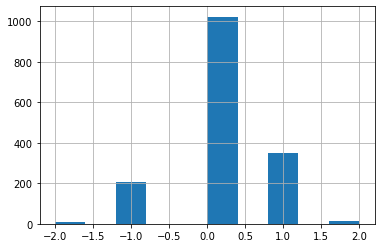

In [84]:
residuals = dataStan['category'] - dataStan['predict']
residuals.hist()

In [85]:
from sklearn.metrics import confusion_matrix,classification_report
C = confusion_matrix(dataStan['category'].values,yhat)
confusionMatrix = pd.DataFrame(data = C, index=['poor(0), true','good(1), true','great(2), true'], 
                               columns = ['poor(0), predicted','good(1), predicted','great(2), predicted'])
confusionMatrix.loc['sum'] = confusionMatrix.sum()
confusionMatrix['sum'] = confusionMatrix.sum(axis=1)
confusionMatrix

,"poor(0), predicted","good(1), predicted","great(2), predicted",sum
"poor(0), true",580,156,8,744
"good(1), true",226,363,49,638
"great(2), true",14,124,79,217
sum,820,643,136,1599


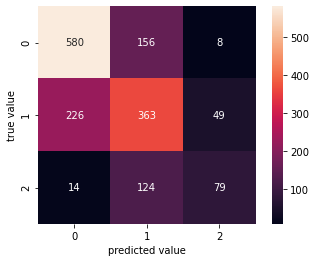

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(dataStan['category'].values,yhat)
sns.heatmap(C,square=True,fmt ='d', annot=True)
plt.xlabel('predicted value')
plt.ylabel('true value');

In [ ]:
# danh gia gi ve mo hinh nay?
# ket luan mo hinh tam on voi loai ruou 0, kem voi loai ruou 1, va rat kem voi loai ruou 2

In [87]:
print(classification_report(dataStan['category'].values,yhat))
#standard accuracy >= 0.8 -> mo hinh du bao tuong doi chinh xac

              precision    recall  f1-score   support

           0       0.71      0.78      0.74       744
           1       0.56      0.57      0.57       638
           2       0.58      0.36      0.45       217

    accuracy                           0.64      1599
   macro avg       0.62      0.57      0.59      1599
weighted avg       0.63      0.64      0.63      1599

